In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib notebook

from scipy import stats
import csv
import ast


## Functions

In [123]:

def uploadData(place,samples,people,shots):
    resultsTest=pd.read_csv(place+"_FeatureSet_1_startPerson_1_endPerson_1.csv")
    if len(resultsTest)!=samples:
        print('error'+' 1'+' 1')
        print(len(resultsTest))

    for i in range(2,people+1):
        auxFrame=pd.read_csv(place+"_FeatureSet_1_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
        resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)
        if len(auxFrame)!=samples:
            print('error'+' 1 '+str(i))
            print(len(auxFrame))
    for j in range(2,4):
        for i in range(1,people+1):
            auxFrame=pd.read_csv(place+"_FeatureSet_"+str(j)+"_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
            resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)

            if len(auxFrame)!=samples:
                print('error'+' '+str(j)+' '+str(i))
                print(len(auxFrame))

    
    return resultsTest.drop(columns='Unnamed: 0')

def uploadDatabase(place,samples,people,shots,Classification=False):
    resultsTest=pd.read_csv(place+"_FeatureSet_1_startPerson_1_endPerson_1.csv")
    if len(resultsTest)!=samples:
        print('error'+' 1'+' 1')
        print(len(resultsTest))

    for i in range(2,people+1):
        auxFrame=pd.read_csv(place+"_FeatureSet_1_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
        resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)
        if len(auxFrame)!=samples:
            print('error'+' 1 '+str(i))
            print(len(auxFrame))
    for j in range(2,4):
        for i in range(1,people+1):
            auxFrame=pd.read_csv(place+"_FeatureSet_"+str(j)+"_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
            resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)

            if len(auxFrame)!=samples:
                print('error'+' '+str(j)+' '+str(i))
                print(len(auxFrame))

    
    return analysisResults(resultsTest.drop(columns='Unnamed: 0'),shots,Classification)


def analysisResults(resultDatabase,shots,Classification=False):
    results= pd.DataFrame(columns=['Feature Set', '# shots']) 
    timeM= pd.DataFrame(columns=[]) 

            
  
    idx=0
    for j in range(1,4):
        for i in range(1,shots+1):
            results.at[idx,'Feature Set']=j
            results.at[idx,'# shots']=i



            subset=str(tuple(range(1, i + 1)))



            LDAmulti=resultDatabase['AccLDAMulti'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
            QDAmulti=resultDatabase['AccQDAMulti'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]

            if Classification:

                LDAInd=resultDatabase['AccClLDAInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                QDAInd=resultDatabase['AccClQDAInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
#                 PropL=resultDatabase['AccClLDAProp'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropQ=resultDatabase['AccClQDAProp'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropQ_L=resultDatabase['AccClLDAPropQ'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
#                 PropL_Q=resultDatabase['AccClQDAPropL'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
#                 SVMInd=resultDatabase['AccClSVMInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
#                 KNNInd=resultDatabase['AccClKNNInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                LiuL=resultDatabase['AccClLDALiu'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                LiuQ=resultDatabase['AccClQDALiu'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                VidL=resultDatabase['AccClLDAVidovic'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                VidQ=resultDatabase['AccClQDAVidovic'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]

            else:
                LDAInd=resultDatabase['AccLDAInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                QDAInd=resultDatabase['AccQDAInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
#                 PropL=resultDatabase['AccLDAProp'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropQ=resultDatabase['AccQDAProp'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropQ_L=resultDatabase['AccLDAPropQ'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
#                 PropL_Q=resultDatabase['AccQDAPropL'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
#                 SVMInd=resultDatabase['AccSVMInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
#                 KNNInd=resultDatabase['AccKNNInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                LiuL=resultDatabase['AccLDALiu'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                LiuQ=resultDatabase['AccQDALiu'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                VidL=resultDatabase['AccLDAVidovic'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                VidQ=resultDatabase['AccQDAVidovic'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]


#             wmL=resultDatabase['wTargetMeanLDAm'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
            wmQ=resultDatabase['wTargetMeanQDAm'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
#             wcL=resultDatabase['wTargetCovLDAm'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
            wcQ=resultDatabase['wTargetCovQDAm'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
            
            tPropQ=resultDatabase['tPropQ'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
            tIndQ=resultDatabase['tCLPropQ'].loc[(resultDatabase['Feature Set'] == j)]
            tIndL=resultDatabase['tCLPropL'].loc[(resultDatabase['Feature Set'] == j)]

            
#             results.at[idx,'LDA_Ind']=LDAInd.mean(axis=0)
#             results.at[idx,'QDA_Ind']=QDAInd.mean(axis=0)
# #             results.at[idx,'SVM_Ind']=SVMInd.mean(axis=0)
#     #                 results.at[idx,'SVM_PropQ']=SVMPropQ.mean(axis=0)
# #             results.at[idx,'KNN_Ind']=KNNInd.mean(axis=0)
#             results.at[idx,'LDA_Multi']=LDAmulti.mean(axis=0)
#             results.at[idx,'QDA_Multi']=QDAmulti.mean(axis=0)
#     #                 results.at[idx,'SVM_Multi']=SVMmulti.mean(axis=0)
#     #                 results.at[idx,'KNN_Multi']=KNNmulti.mean(axis=0)
#             results.at[idx,'LiuL']=LiuL.mean(axis=0)
#             results.at[idx,'LiuQ']=LiuQ.mean(axis=0)
#             results.at[idx,'VidL']=VidL.mean(axis=0)
#             results.at[idx,'VidQ']=VidQ.mean(axis=0)
# #             results.at[idx,'PropL']=PropL.mean(axis=0)
#             results.at[idx,'PropQ']=PropQ.mean(axis=0)
# #             results.at[idx,'PropL_Q']=PropL_Q.mean(axis=0)
#             results.at[idx,'PropQ_L']=PropQ_L.mean(axis=0)
    
    
            results.at[idx,'LDA_Ind']=LDAInd.median(axis=0)
            results.at[idx,'QDA_Ind']=QDAInd.median(axis=0)
#             results.at[idx,'SVM_Ind']=SVMInd.mean(axis=0)
    #                 results.at[idx,'SVM_PropQ']=SVMPropQ.mean(axis=0)
#             results.at[idx,'KNN_Ind']=KNNInd.mean(axis=0)
            results.at[idx,'LDA_Multi']=LDAmulti.median(axis=0)
            results.at[idx,'QDA_Multi']=QDAmulti.median(axis=0)
    #                 results.at[idx,'SVM_Multi']=SVMmulti.mean(axis=0)
    #                 results.at[idx,'KNN_Multi']=KNNmulti.mean(axis=0)
            results.at[idx,'LiuL']=LiuL.median(axis=0)
            results.at[idx,'LiuQ']=LiuQ.median(axis=0)
            results.at[idx,'VidL']=VidL.median(axis=0)
            results.at[idx,'VidQ']=VidQ.median(axis=0)
#             results.at[idx,'PropL']=PropL.mean(axis=0)
            results.at[idx,'PropQ']=PropQ.median(axis=0)
#             results.at[idx,'PropL_Q']=PropL_Q.mean(axis=0)
            results.at[idx,'PropQ_L']=PropQ_L.median(axis=0)
    #                 results.at[idx,'PropKL']=PropKL.mean(axis=0)
    #                 results.at[idx,'PropKQ']=PropKQ.mean(axis=0)
    #                 results.at[idx,'PropSL']=PropSL.mean(axis=0)
    #                 results.at[idx,'PropSQ']=PropSQ.mean(axis=0)
#             results.at[idx,'wmL']=wmL.mean(axis=0)
            results.at[idx,'wmQ']=wmQ.mean(axis=0)
#             results.at[idx,'wcL']=wcL.mean(axis=0)
            results.at[idx,'wcQ']=wcQ.mean(axis=0)
            
            results.at[idx,'tPropQ']=tPropQ.mean(axis=0)
            results.at[idx,'tIndQ']=tIndQ.mean(axis=0)
            results.at[idx,'tIndL']=tIndL.mean(axis=0)
            results.at[idx,'std_tPropQ']=tPropQ.std(axis=0)
            results.at[idx,'std_tIndQ']=tIndQ.std(axis=0)
            results.at[idx,'std_tIndL']=tIndL.std(axis=0)


            results.at[idx,'stdLDA_Ind']=LDAInd.std(axis=0)
            results.at[idx,'stdQDA_Ind']=QDAInd.std(axis=0)
#             results.at[idx,'stdPropL']=PropL.std(axis=0)
            results.at[idx,'stdPropQ_L']=PropQ_L.std(axis=0)
#             results.at[idx,'stdPropL_Q']=PropL_Q.std(axis=0)
            results.at[idx,'stdPropQ']=PropQ.std(axis=0)
            results.at[idx,'stdLiuL']=LiuL.std(axis=0)
            results.at[idx,'stdLiuQ']=LiuQ.std(axis=0)



            confidence=0.05

            p=stats.wilcoxon(PropQ_L.values,LDAInd.values,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                results.at[idx,'T-test (LDA_Ind)']=p
            else:
                results.at[idx,'T-test (LDA_Ind)']=1

            p=stats.wilcoxon(PropQ.values,QDAInd.values,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                results.at[idx,'T-test (QDA_Ind)']=p
            else:
                results.at[idx,'T-test (QDA_Ind)']=1

            p=stats.wilcoxon(PropQ_L.values,LDAmulti.values,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                results.at[idx,'T-test (LDA_Multi)']=p
            else:
                results.at[idx,'T-test (LDA_Multi)']=1

            p=stats.wilcoxon(PropQ.values,QDAmulti.values,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                results.at[idx,'T-test (QDA_Multi)']=p
            else:
                results.at[idx,'T-test (QDA_Multi)']=1


            
#             print('Training Time (Feature set:'+str(j)+' Repetitions:'+str(i)+')',tPropQ.mean(axis=0),'+-',tPropQ.std(axis=0))
            
            idx+=1
        
        timeM.at[j,'meanLDA']=tIndL.mean(axis=0)
        timeM.at[j,'stdLDA']=tIndL.std(axis=0)
        timeM.at[j,'varLDA']=tIndL.var(axis=0)
        timeM.at[j,'meanQDA']=tIndQ.mean(axis=0)
        timeM.at[j,'stdQDA']=tIndQ.std(axis=0)
        timeM.at[j,'varQDA']=tIndQ.var(axis=0)
        
        print('Classification Time Proposed LDA (Feature set:'+str(j)+')',tIndL.mean(axis=0),'+-',tIndL.std(axis=0))
        print('Classification Time Proposed QDA (Feature set:'+str(j)+')',tIndQ.mean(axis=0),'+-',tIndQ.std(axis=0))
        
    return results,timeM





            
#             p=stats.wilcoxon(propL,liu,alternative='greater',zero_method='zsplit')[1]
#             if p<confidence:
#                 print('Acc PropL is better than Acc Liu(p<'+str(confidence)+')')
#             elif pL>l:
#                 print('Acc PropL is better than Acc Liu')


#             p=stats.wilcoxon(propL,c,alternative='greater',zero_method='zsplit')[1]
#             if p<confidence:
#                 print('Acc PropL is better than Acc Cote(p<'+str(confidence)+')')
#             elif pL>co:
#                 print('Acc PropL is better than Acc Cote')
                
                
            




#     #             p=stats.wilcoxon(propQ,indQ,alternative='greater',zero_method='zsplit')[1]
#     #             if p<confidence:
#     #                 print('\nAcc PropQ is better than Acc baseline (p<'+str(confidence)+')')
#     #             elif pQ>iQ:
#     #                 print('Acc PropQ is better than Acc baseline')


#             p=stats.wilcoxon(propQ,liu,alternative='greater',zero_method='zsplit')[1]
#             if p<confidence:
#                 print('Acc PropQ is better than Acc Liu(p<'+str(confidence)+')')
#             elif pQ>l:
#                 print('Acc PropQ is better than Acc Liu')


#             p=stats.wilcoxon(propQ,c,alternative='greater',zero_method='zsplit')[1]
#             if p<confidence:
#                 print('Acc PropQ is better than Acc Cote(p<'+str(confidence)+')')
#             elif pQ>co:
#                 print('Acc PropQ is better than Acc Cote')





    #             p=stats.wilcoxon(propL,indL,alternative='greater',zero_method='zsplit')[1]
    #             if p<confidence:
    #                 print('Acc PropL is better than Acc LDA (p<'+str(confidence)+')')
    #             elif indL.mean()<propL.mean():
    #                 print('Acc PropL is better than Acc LDA')
    #             elif indL.mean()==propL.mean():
    #                 print('Acc PropL and Acc LDA are equals')
    # #             elif indL.mean()>propL.mean():
    # #                 print('Acc Prop is worse than Acc LDA')

    #             p=stats.wilcoxon(propQ,indQ,alternative='greater',zero_method='zsplit')[1]
    #             if p<confidence:
    #                 print('Acc PropQ is better than Acc QDA (p<'+str(confidence)+')')
    #             elif indL.mean()<propL.mean():
    #                 print('Acc PropQ is better than Acc QDA')
    #             elif indL.mean()==propL.mean():
    #                 print('Acc PropQ and Acc QDA are equals')
    # #             elif indQ.mean()>propQ.mean():
    # #                 print('Acc PropQ is worse than Acc QDA')

    #             print(stats.friedmanchisquare(propL,propQ,liu,c))



    
    
    
    
# def graphIndividuals(classifier):
#     FeatureSetM=3
#     fig , ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey='row', figsize=(9, 6))
#     shot=np.arange(1,5)
#     for Data in range(FeatureSetM):
#         if Data==0:
#             resultsLDA=resultsNina5LDA
#             resultsQDA=resultsNina5QDA
#             resultsLDAnoPCA=resultsNina5LDAnoPCA
#             resultsQDAnoPCA=resultsNina5QDAnoPCA
#         elif Data==1:
#             resultsLDA=resultsCoteLDA
#             resultsQDA=resultsCoteQDA
#             resultsLDAnoPCA=resultsCoteLDAnoPCA
#             resultsQDAnoPCA=resultsCoteQDAnoPCA
#         elif Data==2:
#             resultsLDA=resultsEPNLDA
#             resultsQDA=resultsEPNQDA
#             resultsLDAnoPCA=resultsEPNLDAnoPCA
#             resultsQDAnoPCA=resultsEPNQDAnoPCA
#         for FeatureSet in range(FeatureSetM):
             
                       
                
            
#             if classifier == 'LDA':
                
                

#                 Model='Acc(Few)'
                
#                 Y=np.array(resultsLDAnoPCA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
#                 ax[Data,FeatureSet].plot(shot,Y,label='Individual',marker='x',color='red')
                
#                 Y=np.array(resultsLDA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
#                 ax[Data,FeatureSet].plot(shot,Y,label='PCA_Individual',marker='o',color='blue')

                
                


#                 Model='Acc(PK+Few)'
#                 Y=np.array(resultsLDAnoPCA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
#                 ax[Data,FeatureSet].plot(shot,Y,label='Multi-user',marker='x',color='red',linestyle=':')
                
#                 Y=np.array(resultsLDA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
#                 ax[Data,FeatureSet].plot(shot,Y,label='PCA_Multi-user',marker='o',color='blue',linestyle=':')

                
                

#             elif classifier == 'QDA':

#                 Model='Acc(Few)'
#                 Y=np.array(resultsQDAnoPCA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
#                 ax[Data,FeatureSet].plot(shot,Y,label='Individual',marker='x',color='red')
                
#                 Y=np.array(resultsQDA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
#                 ax[Data,FeatureSet].plot(shot,Y,label='PCA_Individual',marker='o',color='blue')            

                
                     


#                 Model='Acc(PK+Few)'
#                 Y=np.array(resultsQDAnoPCA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
#                 ax[Data,FeatureSet].plot(shot,Y,label='Multi-user',marker='x',color='red',linestyle=':')
                
#                 Y=np.array(resultsQDA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
#                 ax[Data,FeatureSet].plot(shot,Y,label='PCA_Multi-user',marker='o',color='blue',linestyle=':')            

                
                



                     
        
#             ax[Data,FeatureSet].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
#             ax[Data,FeatureSet].grid()
# #             ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0, 2, 1))
#             ax[Data,FeatureSet].xaxis.set_ticks(np.arange(1,4.2 , 1))
#     ax[2,0].set_xlabel('shots')
#     ax[2,1].set_xlabel('shots')
#     ax[2,2].set_xlabel('shots')
#     ax[0,0].set_title('Feature Set 1')
#     ax[0,1].set_title('Feature Set 2')
#     ax[0,2].set_title('Feature Set 3')
#     ax[0,0].set_ylabel('NinaPro5\n\naccuracy')
#     ax[1,0].set_ylabel('Cote Allard\n\naccuracy')
#     ax[2,0].set_ylabel('EPN EC\n\naccuracy')
#     ax[0,2].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
# #     ax[0,2].legend(loc='best',prop={'size': 7}) 
# #     ax[1,2].legend(loc='best',prop={'size': 7}) 
# #     ax[2,2].legend(loc='best',prop={'size': 7})  
#     fig.tight_layout(pad=0.1)
    
#     plt.show()

# def labelPoint(xs,ys,ax1):
#     for x,y in zip(xs,ys):

#         label = "{:.2f}".format(y)

#         ax1.annotate(label, # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,-5), # distance from text to points (x,y)
#                      ha='center',
#                     fontsize='small') # horizontal alignment can be left, right or center

# def labelPointA(xs,ys,ax1,std):
#     idx=0
#     for x,y in zip(xs,ys):

#         label = "{:.2f}".format(y)
#         stdi = "{:.2f}".format(std[idx])

#         ax1.annotate(label+'±'+str(stdi), # this is the text
#                      (x,y), # this is the point to label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,-5), # distance from text to points (x,y)
#                      ha='center',
#                     fontsize='small') # horizontal alignment can be left, right or center
#         idx+=1


# def graphsDatabases():
#     FeatureSetM=3
#     shot=np.arange(1,5)
    
#     for Data in range(FeatureSetM):
#         if Data==0:
#             resultsLDA=resultsNina5LDAnoPCA       
#             resultsQDA=resultsNina5QDA
#             fig1 , ax = plt.subplots(nrows=4, ncols=3,sharex=True, sharey='row',  figsize=(9, 7))
#             ModelTxt='NinaPro5'
#             start=0.45
#             end=0.7
#             step=0.05
#         elif Data==1:
#             resultsLDA=resultsCoteLDAnoPCA 
#             resultsQDA=resultsCoteQDA
#             fig2 , ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey='row', figsize=(9, 7))
#             ModelTxt='Cote Allard'
#             start=0.83
#             end=1
#             step=0.05
#         elif Data==2:
#             resultsLDA=resultsEPNLDAnoPCA
#             resultsQDA=resultsEPNQDA
#             fig3 , ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey='row', figsize=(9, 7))
#             ModelTxt='EPN EC'
#             start=0.84
#             end=1
#             step=0.05
#         for F in range(FeatureSetM):
#             FeatureSet=F+1

#             yPropLDA=np.array(resultsLDA['Acc(Prop)'].loc[resultsLDA['Feature Set']==FeatureSet])
#             yLiu=np.array(resultsLDA['Acc(Liu)'].loc[resultsLDA['Feature Set']==FeatureSet])
#             yLDA=np.array(resultsLDA['Acc(Few)'].loc[resultsLDA['Feature Set']==FeatureSet])
# #             yLDApk=np.array(resultsLDA['Acc(PK+Few)'].loc[resultsLDA['Feature Set']==FeatureSet])

#             yPropQDA=np.array(resultsQDA['Acc(Prop)'].loc[resultsQDA['Feature Set']==FeatureSet])
#             yLiuQ=np.array(resultsQDA['Acc(Liu_QDA)'].loc[resultsQDA['Feature Set']==FeatureSet])
#             yQDA=np.array(resultsQDA['Acc(Few)'].loc[resultsQDA['Feature Set']==FeatureSet])
# #             yQDApk=np.array(resultsQDA['Acc(PK+Few)'].loc[resultsQDA['Feature Set']==FeatureSet])



# #             wPropLDA=np.array(resultsLDA['wMeanLDA'].loc[resultsLDA['Feature Set']==FeatureSet])
# #             wPropQDA=np.array(resultsQDA['wMeanQDA'].loc[resultsQDA['Feature Set']==FeatureSet])
# #             wLiu=np.ones(4)*0.5

            
#             tT_PropBlLDA=np.array(resultsLDA['T-test (Prop_Few)'].loc[resultsLDA['Feature Set']==FeatureSet])
#             tT_PropBlQDA=np.array(resultsQDA['T-test (Prop_Few)'].loc[resultsQDA['Feature Set']==FeatureSet])
#             tT_PropLiuLDA=np.array(resultsLDA['T-test (Prop_Liu)'].loc[resultsLDA['Feature Set']==FeatureSet])
#             tT_PropLiuQDA=np.array(resultsQDA['T-test (Prop_Liu)'].loc[resultsQDA['Feature Set']==FeatureSet])
# #             tT_PropPkLDA=np.array(resultsLDA['T-test (Prop_PK+Few)'].loc[resultsLDA['Feature Set']==FeatureSet])
# #             tT_PropPkQDA=np.array(resultsQDA['T-test (Prop_PK+Few)'].loc[resultsQDA['Feature Set']==FeatureSet])







            

#             ax[0,F].plot(shot, yPropLDA, label='Adaptive',marker='^',color='green')
# #             labelPoint(shot,yPropLDA,ax[0,F])
            
#             ax[0,F].plot(shot, yLDA, label='BL: Individual',marker='x',color='red')
# #             labelPoint(shot,yLDA,ax[0,F])
# #             ax[0,F].plot(shot, yLiu, label='Liu',marker='v',color='orange')
# #             labelPoint(shot,yLiu,ax[0,F])
# #             ax[0,F].plot(shot, yLDApk, label='BL (PK+Few)',marker='^',color='red')
# #             labelPoint(shot,yLDApk,ax[0,F])
# #             ax[0,F].yaxis.set_ticks(np.arange(start, end, step))
#             ax[0,F].grid()
#             ax[0,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        
# #             ax2 = ax[0,F].twinx()
#             ax[1,F].plot(shot, tT_PropBlLDA, label='H0 (Adaptive-BL)',marker='x',color='red')
# #             ax[1,F].plot(shot, tT_PropLiuLDA, label='H0 (Adaptive-Liu)',marker='v',color='orange')
# #             ax2.plot(shot, tT_PropPkLDA, label='H (Adapt_PK+Few)', linestyle='-.',color='red',marker='^')
#             ax[1,F].set_ylim([-0.1, 1.1])
#             ax[1,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%1d'))
#             ax[1,F].grid()
#             if F<=1:
#                 ax[1,F].set_yticklabels([])
#             if F==2:
# #                 ax[1,F].set_ylabel('Null Hypothesis')
#                 ax[1,F].yaxis.set_ticks(np.arange(0, 2, 1))
#                 ax[1,F].legend(bbox_to_anchor=(1.23, 0.6), loc='upper left', borderaxespad=0.)

            
            
            
            
# #             ax[1,F].plot(shot, 1-wPropLDA , label='w (Proposed)',color='green')
# # #             labelPoint(shot,1-wPropLDA,ax[1,F])
# # #             ax[1,F].plot(shot, wLiu, label='w (Liu)', linestyle=':',marker='s')
# #             ax[1,F].grid()
# #             ax[1,F].set_ylim([0.05, 0.55])
# #             ax[1,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
            
            
            
            
            
            

#             ax[2,F].plot(shot, yPropQDA, label='Adaptive',marker='o',color='green')
# #             labelPoint(shot,yPropQDA,ax[2,F])
#             ax[2,F].plot(shot, yQDA, label='BL: PCA_Individual',marker='o',color='blue')
# #             labelPoint(shot,yQDA,ax[2,F])
# #             ax[2,F].plot(shot, yLiuQ, label='Liu',marker='v',color='orange')
# #             labelPoint(shot,yLiuQ,ax[2,F])
            
# #             ax[2,F].plot(shot, yQDApk, label='BL (PK+Few)',marker='^',color='red')
# #             labelPoint(shot,yQDApk,ax[2,F])
            
# #             ax[2,F].yaxis.set_ticks(np.arange(start, end, step))
#             ax[2,F].grid()
#             ax[2,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        
            
# #             ax3 = ax[1,F].twinx()
#             ax[3,F].plot(shot, tT_PropBlQDA, label='H0 (Adaptive-BL)',marker='o',color='blue')
# #             ax[3,F].plot(shot, tT_PropLiuQDA, label='H0 (Adaptive-Liu)',marker='v',color='orange')
            
# #             ax3.plot(shot, tT_PropPkQDA, label='H (Adapt_PK+Few)', linestyle='-.',color='red',marker='^')
#             ax[3,F].set_ylim([-0.1, 1.1])
#             ax[3,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%1d'))
#             ax[3,F].grid()
#             if F<=1:
#                 ax[3,F].set_yticklabels([])
#             if F==2:
# #                 ax[3,F].set_ylabel('Null hypothesis')
#                 ax[3,F].yaxis.set_ticks(np.arange(0, 2, 1))
#                 ax[3,F].legend(bbox_to_anchor=(1.23, 0.6), loc='upper left', borderaxespad=0.)
            
            
            
                
            
# #             ax[3,F].plot(shot, 1-wPropQDA , label='w (Proposed)',color='green')
# # #             labelPoint(shot,1-wPropQDA,ax[3,F])
# # #             ax[3,F].plot(shot, wLiu, label='w (Liu)', linestyle=':',marker='s')
# #             ax[3,F].grid()
# #             ax[3,F].set_ylim([0.05, 0.55])
# #             ax[3,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
            
            
            
        
        
        
#         ax[0,0].set_ylabel('LDA\n\naccuracy')
#         ax[1,0].set_ylabel('LDA\n\nnull hypothesis')
#         ax[2,0].set_ylabel('QDA\n\naccuracy')
#         ax[3,0].set_ylabel('QDA\n\nnull hypothesis')
#         ax[1,0].set_xlabel('shots')
#         ax[1,1].set_xlabel('shots')
#         ax[1,2].set_xlabel('shots')
#         ax[0,0].set_title('Feature Set 1')
# #         ax[0,1].set_title(ModelTxt+'\n\nFeature 2')
#         ax[0,1].set_title('Feature Set 2')
#         ax[0,2].set_title('Feature Set 3')
#         ax[0,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
#         ax[1,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
#         ax[2,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
#         ax[3,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
# #         ax[2,2].legend(loc='lower right',prop={'size': 7})
# #         ax[3,2].legend(loc='center right',prop={'size': 7})
        
#     fig1.tight_layout(pad=0.4)
#     fig2.tight_layout(pad=0.4)
#     fig3.tight_layout(pad=0.4)
#     plt.show()

    
    
# def graphScientLiterat():
    
#     fig , ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(9, 8))
#     shot=np.arange(1,5)
#     for Database in range(3):
#         if Database==0:
#             proposedLDA=np.array(resultsNina5LDAnoPCA['Acc(Prop)'].loc[resultsNina5LDAnoPCA['Feature Set']==3])
#             proposedQDA=np.array(resultsNina5QDA['Acc(Prop)'].loc[resultsNina5QDA['Feature Set']==3])
#             liu=np.array(resultsNina5LDAnoPCA['Acc(Liu)'].loc[resultsNina5LDAnoPCA['Feature Set']==2])
#             STDproposedLDA=np.array(resultsNina5LDAnoPCA['Std(Prop)'].loc[resultsNina5LDAnoPCA['Feature Set']==3])
#             STDproposedQDA=np.array(resultsNina5QDA['Std(Prop)'].loc[resultsNina5QDA['Feature Set']==3])
#             STDliu=np.array(resultsNina5LDAnoPCA['Std(Liu)'].loc[resultsNina5LDAnoPCA['Feature Set']==2])
#     #             liuLDA=np.array(resultsNina5LDAnoPCA['Acc(Liu)'].loc[resultsNina5LDAnoPCA['Feature Set']==3])
#             cote=np.array([0.4941,0.6012,0.6516,0.6898])
#             STDcote=np.array([0.0582,0.0479,0.0446,0.0409])
#         elif Database==1:
#             proposedLDA=np.array(resultsCoteLDAnoPCA['Acc(Prop)'].loc[resultsCoteLDAnoPCA['Feature Set']==3])
#             proposedQDA=np.array(resultsCoteQDA['Acc(Prop)'].loc[resultsCoteQDA['Feature Set']==3])
#             liu=np.array(resultsCoteLDAnoPCA['Acc(Liu)'].loc[resultsCoteLDAnoPCA['Feature Set']==2])
#             STDproposedLDA=np.array(resultsCoteLDAnoPCA['Std(Prop)'].loc[resultsCoteLDAnoPCA['Feature Set']==3])
#             STDproposedQDA=np.array(resultsCoteQDA['Std(Prop)'].loc[resultsCoteQDA['Feature Set']==3])
#             STDliu=np.array(resultsCoteLDAnoPCA['Std(Liu)'].loc[resultsCoteLDAnoPCA['Feature Set']==2])
#     #             liuLDA=np.array(resultsCoteLDAnoPCA['Acc(Liu)'].loc[resultsCoteLDAnoPCA['Feature Set']==3])
#             cote=np.array([0.9469,0.9663,0.9782,0.9831])
#             STDcote=np.array([0.0558,0.0454,0.0241,0.0216])
#         elif Database==2:
#             proposedLDA=np.array(resultsEPNLDAnoPCA['Acc(Prop)'].loc[resultsEPNLDAnoPCA['Feature Set']==3])
#             proposedQDA=np.array(resultsEPNQDA['Acc(Prop)'].loc[resultsEPNQDA['Feature Set']==3])
#             liu=np.array(resultsEPNLDAnoPCA['Acc(Liu)'].loc[resultsEPNLDAnoPCA['Feature Set']==2])
#             liuLDA=np.array(resultsEPNLDAnoPCA['Acc(Liu)'].loc[resultsEPNLDAnoPCA['Feature Set']==3])
#             STDproposedLDA=np.array(resultsEPNLDAnoPCA['Std(Prop)'].loc[resultsEPNLDAnoPCA['Feature Set']==3])
#             STDproposedQDA=np.array(resultsEPNQDA['Std(Prop)'].loc[resultsEPNQDA['Feature Set']==3])
#             STDliu=np.array(resultsEPNLDAnoPCA['Std(Liu)'].loc[resultsEPNLDAnoPCA['Feature Set']==2])





# #         ax.errorbar(shot, proposedLDA, yerr=STD, uplims=True, lolims=True, label='Proposed LDA')
    
        
      
        
#         ax[Database].errorbar(shot,proposedLDA,label='Proposed_LDA_3',marker='^',color='green')
# #         labelPointA(shot,proposedLDA,ax[Database],STDproposedLDA)
#         ax[Database].errorbar(shot,proposedQDA,label='Proposed_QDA_3',marker='o',color='green')
# #         labelPointA(shot,proposedQDA,ax[Database],STDproposedQDA)
#         ax[Database].errorbar(shot,liu,label='Liu',marker='v',color='orange')
# #         labelPointA(shot,liu,ax[Database],STDliu)
# #         ax[Database].plot(shot,liuLDA,label='Liu_LDA_3',marker='+')
# #         labelPoint(shot,liuLDA,ax[Database])
        
#         if Database != 2:
#             ax[Database].errorbar(shot,cote,label='Cote Allard',marker='*',color='brown')
# #             labelPointA(shot,cote,ax[Database],STDcote)
                          
        
#         ax[Database].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
#         ax[Database].xaxis.set_ticks(np.arange(1,4.2 , 1))
#         ax[Database].grid()
#         ax[Database].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
#     ax[2].set_xlabel('shots')
#     ax[0].set_ylabel('NinaPro5\n\naccuracy')
#     ax[1].set_ylabel('Cote Allard\n\naccuracy')
#     ax[2].set_ylabel('EPN EC\n\naccuracy')
#     fig.tight_layout(pad=0.1)
#     plt.show()

    
# def graphTime(timeNina5,timeCote,timeEPN):
    
#     timeNina5=timeNina5.reset_index(drop=True)
#     timeCote=timeCote.reset_index(drop=True)
#     timeEPN=timeEPN.reset_index(drop=True)
#     fig , ax = plt.subplots(nrows=6, ncols=3, figsize=(9, 8))
#     shot=np.arange(1,5)
#     for Database in range(3):
#         if Database==0:
#             data=timeNina5        
#         elif Database==1:
#             data=timeCote
#         elif Database==2:
#             data=timeEPN




      
#         mu=np.array(data['meanL'].loc[0])
#         sigma=np.array(data['varL'].loc[0])
#         x = np.linspace(mu - mu, mu + sigma, 100)
#         ax[(Database+1)*2-2,0].plot(x, stats.norm.pdf(x, mu, sigma))
        
#         mu=np.array(data['meanL'].loc[1])
#         sigma=np.array(data['varL'].loc[1])
#         x = np.linspace(mu - sigma, mu + sigma, 100)
#         ax[(Database+1)*2-2,1].plot(x, stats.norm.pdf(x, mu, sigma))
        
#         mu=np.array(data['meanL'].loc[2])
#         sigma=np.array(data['varL'].loc[2])
#         x = np.linspace(mu - sigma, mu + sigma, 100)
#         ax[(Database+1)*2-2,2].plot(x, stats.norm.pdf(x, mu, sigma))
        
#         mu=np.array(data['meanQ'].loc[0])
#         sigma=np.array(data['varQ'].loc[0])
#         x = np.linspace(mu - mu, mu + sigma, 100)
#         ax[(Database+1)*2-1,0].plot(x, stats.norm.pdf(x, mu, sigma))
        
#         mu=np.array(data['meanQ'].loc[1])
#         sigma=np.array(data['varQ'].loc[1])
#         x = np.linspace(mu - sigma, mu + sigma, 100)
#         ax[(Database+1)*2-1,1].plot(x, stats.norm.pdf(x, mu, sigma))
        
#         mu=np.array(data['meanQ'].loc[2])
#         sigma=np.array(data['varQ'].loc[2])
#         x = np.linspace(mu - sigma, mu + sigma, 100)
#         ax[(Database+1)*2-1,2].plot(x, stats.norm.pdf(x, mu, sigma))
        
        
        
        
        
        
        
        
          
        
# #         ax[Database].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
# #         ax[Database].xaxis.set_ticks(np.arange(1,4.2 , 1))
# #         ax[Database].grid()
# #     ax[,0].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)

#     ax[0,0].set_title('Adaptive')
#     ax[0,1].set_title('BL: Individual')
#     ax[0,2].set_title('BL: Multi-user')
#     ax[5,0].set_xlabel('Time')
#     ax[5,1].set_xlabel('Time')
#     ax[5,2].set_xlabel('Time')
#     ax[0,0].set_ylabel('NinaPro5\nLDA')
#     ax[1,0].set_ylabel('NinaPro5\nQDA')
#     ax[2,0].set_ylabel('Cote\nLDA')
#     ax[3,0].set_ylabel('Cote\nQDA')
#     ax[4,0].set_ylabel('EPN\nLDA')
#     ax[5,0].set_ylabel('EPN\nQDA')
    
#     fig.tight_layout(pad=0.1)
#     plt.show()



## Graphs

**Feature Set 1:**
1. Mean absolute value (MAV)

**Feature Set 2:**

1. Mean absolute value (MAV)
2. Waveform length (WL)
3. Zero Crossing (ZC)
4. Slope sign change (SSC)

**Feature Set 3:**

1. L-scale (LS)
2. Maximum fractal length (MFL)
3. Mean of the square root (MSR)
4. Willison amplitude (WAMP)

### Analysis of the Baselines

Baselines are the classifiers LDA and QDA which are trained using 4 different training sets:

1. Principal component analysis and few shots **(PCA_Few)**
2. Few shots **(Few)**
3. Principal component analysis and few shots + Prior knowledge **(PCA_Few+PK)**
4. Few shots + Prior knowledge **(Few+PK)**

# Extraction Time of the Feature Sets 

In [ ]:
w=''
extractionTimeE=pd.read_csv('ExtractedData/ExtractedDataCollectedData/timesFeatures'+str(w)+'.csv',header=None)
extractionTimeC=pd.read_csv('ExtractedData/ExtractedDataCoteAllard/timesFeatures'+str(w)+'.csv',header=None)
extractionTimeN=pd.read_csv('ExtractedData/ExtractedDataNinaDB5/timesFeatures'+str(w)+'.csv',header=None)
w='295'
extractionTimeE295=pd.read_csv('ExtractedData/ExtractedDataCollectedData/timesFeatures'+str(w)+'.csv',header=None)
extractionTimeC295=pd.read_csv('ExtractedData/ExtractedDataCoteAllard/timesFeatures'+str(w)+'.csv',header=None)
extractionTimeN295=pd.read_csv('ExtractedData/ExtractedDataNinaDB5/timesFeatures'+str(w)+'.csv',header=None)


In [202]:

for featureSet in range(3):
    print('EPN Feature Set ('+str(featureSet+1)+'): ',extractionTimeE.loc[featureSet,:].mean(),
          '+-',extractionTimeE.loc[featureSet,:].std())
    print('Nina5 Feature Set ('+str(featureSet+1)+'): ',extractionTimeN.loc[featureSet,:].mean(),
          '+-',extractionTimeN.loc[featureSet,:].std())
    print('Cote Feature Set ('+str(featureSet+1)+'): ',extractionTimeC.loc[featureSet,:].mean(),
          '+-',extractionTimeC.loc[featureSet,:].std())

EPN Feature Set (1):  4.608582360778564e-05 +- 0.00014552414635541657
Nina5 Feature Set (1):  4.2112149445972395e-05 +- 0.0004119195754479599
Cote Feature Set (1):  3.238590301118105e-05 +- 0.00012401602079148058
EPN Feature Set (2):  0.0005026628477551344 +- 0.00034035790020281735
Nina5 Feature Set (2):  0.0006320389480693713 +- 0.0013647585858994847
Cote Feature Set (2):  0.00039451653703411653 +- 0.0003840295580530928
EPN Feature Set (3):  0.0010136447726612448 +- 0.0005545234480711292
Nina5 Feature Set (3):  0.0014898259625388292 +- 0.0023644037179088315
Cote Feature Set (3):  0.0008481008658277865 +- 0.0006153281406164566


In [216]:

for featureSet in range(3):
    print('EPN Feature Set ('+str(featureSet+1)+'): ',extractionTimeE295.loc[featureSet,:].mean(),
          '+-',extractionTimeE295.loc[featureSet,:].std())
    print('Nina5 Feature Set ('+str(featureSet+1)+'): ',extractionTimeN295.loc[featureSet,:].mean(),
          '+-',extractionTimeN295.loc[featureSet,:].std())
    print('Cote Feature Set ('+str(featureSet+1)+'): ',extractionTimeC295.loc[featureSet,:].mean(),
          '+-',extractionTimeC295.loc[featureSet,:].std())
    

EPN Feature Set (1):  3.2867239614871e-05 +- 0.00018131163703730092
Nina5 Feature Set (1):  2.960327767513867e-05 +- 0.00012825023209215114
Cote Feature Set (1):  4.114077350904477e-05 +- 0.0004020596661379296
EPN Feature Set (2):  0.0003707845481323695 +- 0.000501901144828852
Nina5 Feature Set (2):  0.000542123744164131 +- 0.00025601174082157243
Cote Feature Set (2):  0.0004949401110052983 +- 0.0012384737713908912
EPN Feature Set (3):  0.000754645652755885 +- 0.00060178229856893
Nina5 Feature Set (3):  0.001288696793852304 +- 0.000392221470432785
Cote Feature Set (3):  0.0010663384825006926 +- 0.0016012705854826267


In [215]:
extractionTimeN295.loc[1,:].std()

0.00025601174082157243

### 260ms window and 235ms overlap

### NinaPro5

In [174]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
samplesPerFile=4
people=10
shots=4
Classification=False
place="Experiments/DatabasesEvaluation/Results/ResultsDatabases/NinaPro5"
resultsNina5T=uploadDatabase(place,samplesPerFile,people,shots,Classification)
# resultsNina5T[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind','tPropQ','tIndQ','tIndL','std_tPropQ','std_tIndQ','std_tIndL']]


Classification Time Proposed LDA (Feature set:1) 0.0010762295631268452 +- 1.014849607484368e-05
Classification Time Proposed LDA (Feature set:1) 0.001679823325813953 +- 1.39738117373542e-05
Classification Time Proposed LDA (Feature set:2) 0.001583471150490342 +- 1.1775480308982704e-05
Classification Time Proposed LDA (Feature set:2) 0.002259374850838711 +- 2.9482981208221796e-05
Classification Time Proposed LDA (Feature set:3) 0.0015678318281559765 +- 1.2434785414463842e-05
Classification Time Proposed LDA (Feature set:3) 0.0022597179007887163 +- 1.8405009927922366e-05


### Upload Cote Allard

In [175]:
samplesPerFile=4
people=17
shots=4
Classification=False
place="Experiments/DatabasesEvaluation/Results/ResultsDatabases/Cote"
resultsCoteT=uploadDatabase(place,samplesPerFile,people,shots,Classification)
# resultsCoteT[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind','tPropQ','tIndQ','tIndL','std_tPropQ','std_tIndQ','std_tIndL']]


Classification Time Proposed LDA (Feature set:1) 0.0007562721725783254 +- 0.0004511711310116141
Classification Time Proposed LDA (Feature set:1) 0.0011750892477328378 +- 0.0011243638315469409
Classification Time Proposed LDA (Feature set:2) 0.00106799355438241 +- 0.0007820916490154026
Classification Time Proposed LDA (Feature set:2) 0.0012341924186026637 +- 0.0005293168825342305
Classification Time Proposed LDA (Feature set:3) 0.0009989976279500686 +- 0.0007447068666729333
Classification Time Proposed LDA (Feature set:3) 0.0011687738025389274 +- 0.0006836734238584817


### Upload EPN

In [176]:
samplesPerFile=25
people=30
shots=25
Classification=False
place="Experiments/DatabasesEvaluation/Results/ResultsDatabases/EPN"
resultsEPNT=uploadDatabase(place,samplesPerFile,people,shots,Classification)
# resultsEPNT[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind','tPropQ','tIndQ','tIndL','std_tPropQ','std_tIndQ','std_tIndL']]


Classification Time Proposed LDA (Feature set:1) 0.0005765953024079346 +- 0.00012737204929685677
Classification Time Proposed LDA (Feature set:1) 0.00087571836124369 +- 0.00021096947077275593
Classification Time Proposed LDA (Feature set:2) 0.0007279711246632014 +- 0.00023928444549361287
Classification Time Proposed LDA (Feature set:2) 0.0010312102189608794 +- 0.00038615670207455384
Classification Time Proposed LDA (Feature set:3) 0.000724874944638282 +- 0.00023699815681144543
Classification Time Proposed LDA (Feature set:3) 0.0010383717466757303 +- 0.00040050553235130426


<IPython.core.display.Javascript object>


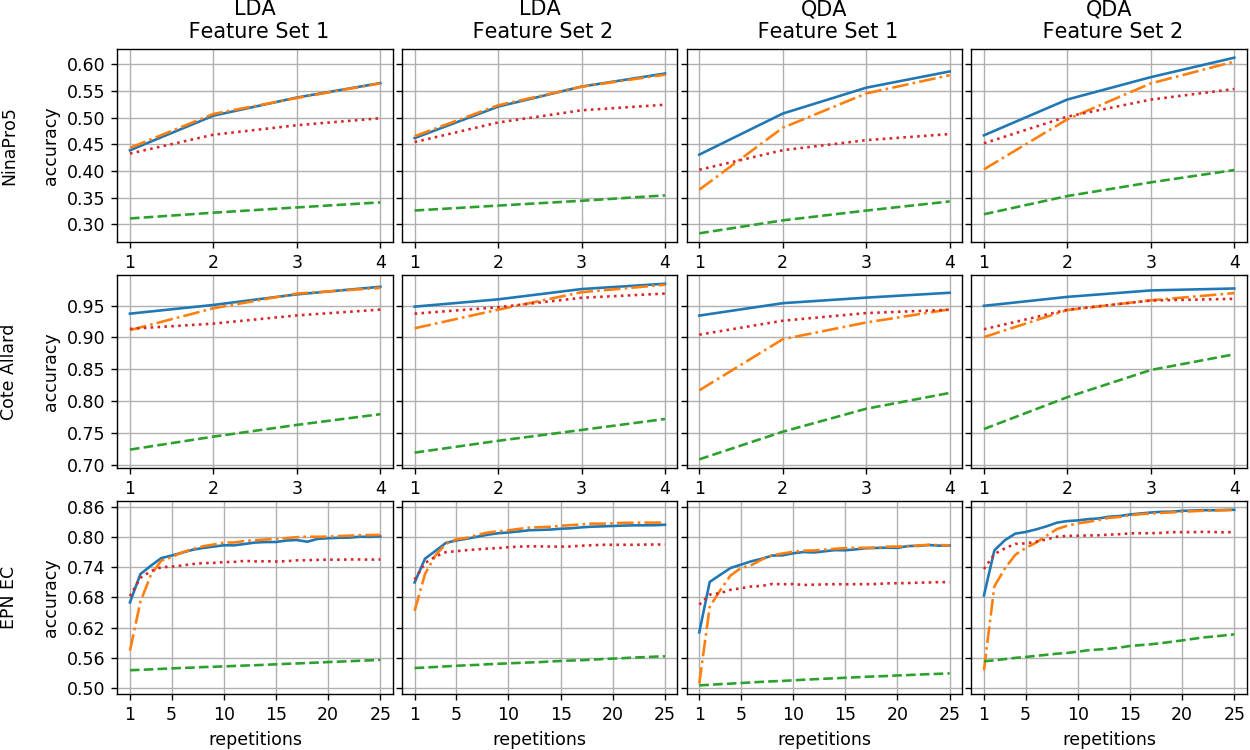

In [177]:
graphACC2('Time')

<IPython.core.display.Javascript object>


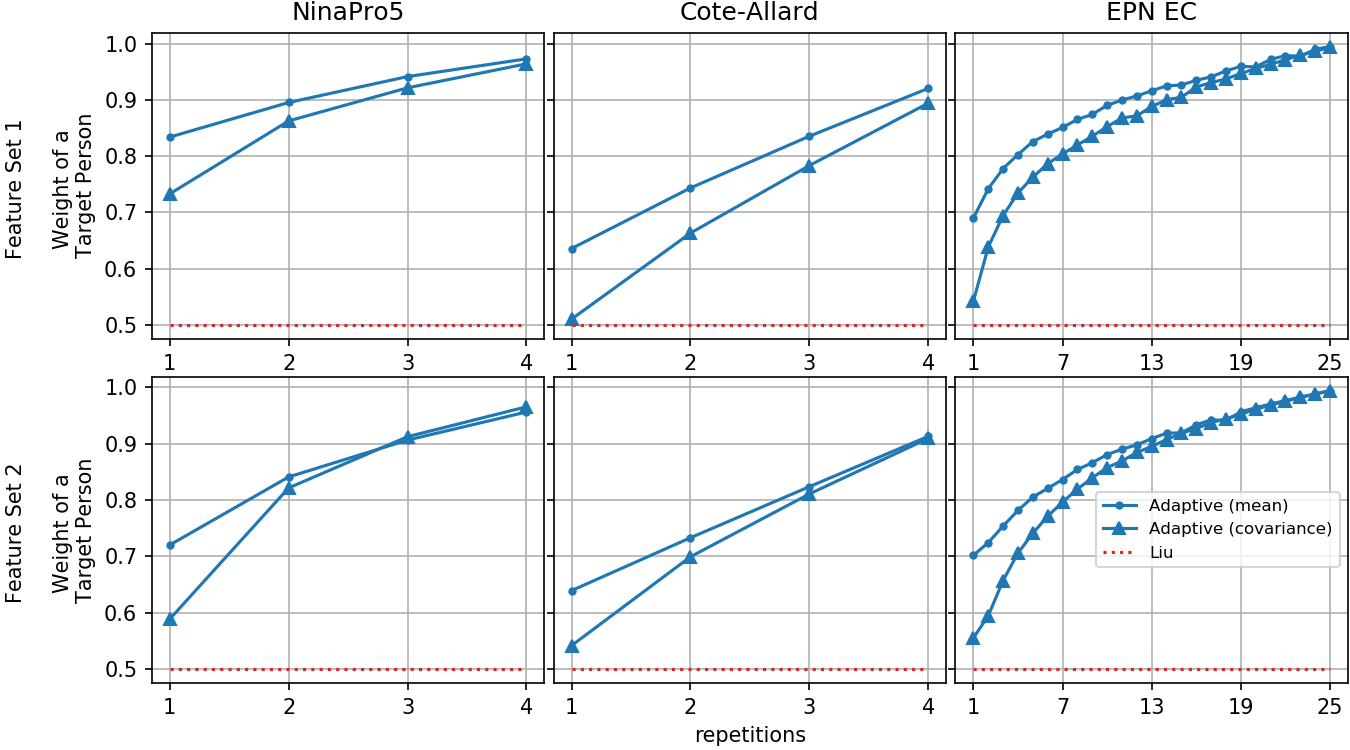

In [123]:
graphWeights()

### 295ms window and 290ms overlap

### NinaPro5

In [235]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
samplesPerFile=4
people=10
shots=4
Classification=False
place="Experiments/DatabasesEvaluation/Results/ResultsDatabases295/NinaPro5"
resultsNina5T,timeM=uploadDatabase(place,samplesPerFile,people,shots,Classification)
# resultsNina5T[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind','tPropQ','tIndQ','tIndL','std_tPropQ','std_tIndQ','std_tIndL']]


for featureSet in range(1,3):
    print('\nLDA')
    extractionT=extractionTimeN295
    CL='LDA'
    print('Extraction',extractionT.loc[featureSet,:].mean(),extractionT.loc[featureSet,:].std(),
         'classification',timeM.loc[featureSet+1,'mean'+CL],timeM.loc[featureSet+1,'std'+CL],
         'response time',(extractionT.loc[featureSet,:].mean()+timeM.loc[featureSet+1,'mean'+CL]),
         np.sqrt((extractionT.loc[featureSet,:].var()+timeM.loc[featureSet+1,'var'+CL])))
    print('\nQDA')
    CL='QDA'
    print('Extraction',extractionT.loc[featureSet,:].mean(),extractionT.loc[featureSet,:].std(),
         'classification',timeM.loc[featureSet+1,'mean'+CL],timeM.loc[featureSet+1,'std'+CL],
         'response time',(extractionT.loc[featureSet,:].mean()+timeM.loc[featureSet+1,'mean'+CL]),
         np.sqrt((extractionT.loc[featureSet,:].var()+timeM.loc[featureSet+1,'var'+CL])))

Classification Time Proposed LDA (Feature set:1) 0.0012596091021952456 +- 0.0004008888188976272
Classification Time Proposed QDA (Feature set:1) 0.0018506616237485608 +- 0.00028788619628717255
Classification Time Proposed LDA (Feature set:2) 0.0017341475322401785 +- 0.00024031806930464912
Classification Time Proposed QDA (Feature set:2) 0.0024725071148223015 +- 0.00027676421152392607
Classification Time Proposed LDA (Feature set:3) 0.00171288571859021 +- 0.0002614407211865118
Classification Time Proposed QDA (Feature set:3) 0.002412639066617073 +- 0.00023358659583908324

LDA
Extraction 0.000542123744164131 0.00025601174082157243 classification 0.0017341475322401785 0.00024031806930464912 response time 0.0022762712764043094 0.00035113357269393383

QDA
Extraction 0.000542123744164131 0.00025601174082157243 classification 0.0024725071148223015 0.00027676421152392607 response time 0.0030146308589864322 0.0003770151723988737

LDA
Extraction 0.001288696793852304 0.000392221470432785 classifi

### Upload Cote Allard

In [234]:
samplesPerFile=4
people=17
shots=4
Classification=False
place="Experiments/DatabasesEvaluation/Results/ResultsDatabases295/Cote"
resultsCoteT,timeM=uploadDatabase(place,samplesPerFile,people,shots,Classification)
# resultsCoteT[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind','tPropQ','tIndQ','tIndL','std_tPropQ','std_tIndQ','std_tIndL']]


for featureSet in range(1,3):
    print('\nLDA')
    extractionT=extractionTimeC295
    CL='LDA'
    print('Extraction',extractionT.loc[featureSet,:].mean(),extractionT.loc[featureSet,:].std(),
         'classification',timeM.loc[featureSet+1,'mean'+CL],timeM.loc[featureSet+1,'std'+CL],
         'response time',(extractionT.loc[featureSet,:].mean()+timeM.loc[featureSet+1,'mean'+CL]),
         np.sqrt((extractionT.loc[featureSet,:].var()+timeM.loc[featureSet+1,'var'+CL])))
    print('\nQDA')
    CL='QDA'
    print('Extraction',extractionT.loc[featureSet,:].mean(),extractionT.loc[featureSet,:].std(),
         'classification',timeM.loc[featureSet+1,'mean'+CL],timeM.loc[featureSet+1,'std'+CL],
         'response time',(extractionT.loc[featureSet,:].mean()+timeM.loc[featureSet+1,'mean'+CL]),
         np.sqrt((extractionT.loc[featureSet,:].var()+timeM.loc[featureSet+1,'var'+CL])))

Classification Time Proposed LDA (Feature set:1) 0.0006664521602858644 +- 0.00034610647433068036
Classification Time Proposed QDA (Feature set:1) 0.0009204499096026231 +- 0.0004998074629604097
Classification Time Proposed LDA (Feature set:2) 0.0011783141403377607 +- 0.0007997765520433213
Classification Time Proposed QDA (Feature set:2) 0.0012693401418433562 +- 0.0007159660504134198
Classification Time Proposed LDA (Feature set:3) 0.0011843879930972516 +- 0.0007042900008825381
Classification Time Proposed QDA (Feature set:3) 0.0012036080056378536 +- 0.000578739357326172

LDA
Extraction 0.0004949401110052983 0.0012384737713908912 classification 0.0011783141403377607 0.0007997765520433213 response time 0.001673254251343059 0.0014742658564931498

QDA
Extraction 0.0004949401110052983 0.0012384737713908912 classification 0.0012693401418433562 0.0007159660504134198 response time 0.0017642802528486544 0.0014305330012858036

LDA
Extraction 0.0010663384825006926 0.0016012705854826267 classificat

### Upload EPN

In [233]:
samplesPerFile=25
people=30
shots=25
Classification=False
place="Experiments/DatabasesEvaluation/Results/ResultsDatabases295/EPN"
resultsEPNT,timeM=uploadDatabase(place,samplesPerFile,people,shots,Classification)
# resultsEPNT[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind','tPropQ','tIndQ','tIndL','std_tPropQ','std_tIndQ','std_tIndL']]


for featureSet in range(1,3):
    print('\nLDA')
    extractionT=extractionTimeE295
    CL='LDA'
    print('Extraction',extractionT.loc[featureSet,:].mean(),extractionT.loc[featureSet,:].std(),
         'classification',timeM.loc[featureSet+1,'mean'+CL],timeM.loc[featureSet+1,'std'+CL],
         'response time',(extractionT.loc[featureSet,:].mean()+timeM.loc[featureSet+1,'mean'+CL]),
         np.sqrt((extractionT.loc[featureSet,:].var()+timeM.loc[featureSet+1,'var'+CL])))
    print('\nQDA')
    CL='QDA'
    print('Extraction',extractionT.loc[featureSet,:].mean(),extractionT.loc[featureSet,:].std(),
         'classification',timeM.loc[featureSet+1,'mean'+CL],timeM.loc[featureSet+1,'std'+CL],
         'response time',(extractionT.loc[featureSet,:].mean()+timeM.loc[featureSet+1,'mean'+CL]),
         np.sqrt((extractionT.loc[featureSet,:].var()+timeM.loc[featureSet+1,'var'+CL])))


Classification Time Proposed LDA (Feature set:1) 0.000618989294085552 +- 0.00012742818982537042
Classification Time Proposed QDA (Feature set:1) 0.0009390942608778685 +- 0.0002149207635188298
Classification Time Proposed LDA (Feature set:2) 0.0008043073224602553 +- 0.0002441611680614433
Classification Time Proposed QDA (Feature set:2) 0.0010995494022808898 +- 0.00035191227829540686
Classification Time Proposed LDA (Feature set:3) 0.0008090252538325744 +- 0.00023860419928811472
Classification Time Proposed QDA (Feature set:3) 0.0010978457202481925 +- 0.00034807372617381364

LDA
Extraction 0.0003707845481323695 0.000501901144828852 classification 0.0008043073224602553 0.0002441611680614433 response time 0.0011750918705926248 0.0005581392614479299

QDA
Extraction 0.0003707845481323695 0.000501901144828852 classification 0.0010995494022808898 0.00035191227829540686 response time 0.0014703339504132593 0.0006129820640080558

LDA
Extraction 0.000754645652755885 0.00060178229856893 classificat

In [126]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
samplesPerFile=4
people=10
shots=4
Classification=False
place="Experiments/DatabasesEvaluation/Results/ResultsTotal/NinaPro5"
resultsNina5T,timeM=uploadDatabase(place,samplesPerFile,people,shots,Classification)
# resultsNina5T[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind','tPropQ','tIndQ','tIndL','std_tPropQ','std_tIndQ','std_tIndL']]

samplesPerFile=4
people=17
shots=4
Classification=False
place="Experiments/DatabasesEvaluation/Results/ResultsTotal/Cote"
resultsCoteT,timeM=uploadDatabase(place,samplesPerFile,people,shots,Classification)
# resultsCoteT[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind','tPropQ','tIndQ','tIndL','std_tPropQ','std_tIndQ','std_tIndL']]

samplesPerFile=25
people=30
shots=4
Classification=False
place="Experiments/DatabasesEvaluation/Results/ResultsTotal/EPN"
resultsEPNT,timeM=uploadDatabase(place,samplesPerFile,people,shots,Classification)
# resultsEPNT[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind','tPropQ','tIndQ','tIndL','std_tPropQ','std_tIndQ','std_tIndL']]

# resultsNina5T
# resultsEPNT

Classification Time Proposed LDA (Feature set:1) 0.0010763165289190376 +- 2.10180251572315e-05
Classification Time Proposed QDA (Feature set:1) 0.001689852502130363 +- 4.763717222620337e-05
Classification Time Proposed LDA (Feature set:2) 0.001596620838010566 +- 1.9003930351585814e-05
Classification Time Proposed QDA (Feature set:2) 0.0022782076483016424 +- 3.153558358326304e-05
Classification Time Proposed LDA (Feature set:3) 0.0015799304638101103 +- 2.0073404413697438e-05
Classification Time Proposed QDA (Feature set:3) 0.002271660440257431 +- 2.5516543991595023e-05
Classification Time Proposed LDA (Feature set:1) 0.0008216121539485053 +- 0.00044768977036696036
Classification Time Proposed QDA (Feature set:1) 0.0013276910090114467 +- 0.0007132202727994174
Classification Time Proposed LDA (Feature set:2) 0.0009593427475228687 +- 0.0004331952113431282
Classification Time Proposed QDA (Feature set:2) 0.0013171267703963653 +- 0.0006239208617372313
Classification Time Proposed LDA (Featur

<IPython.core.display.Javascript object>


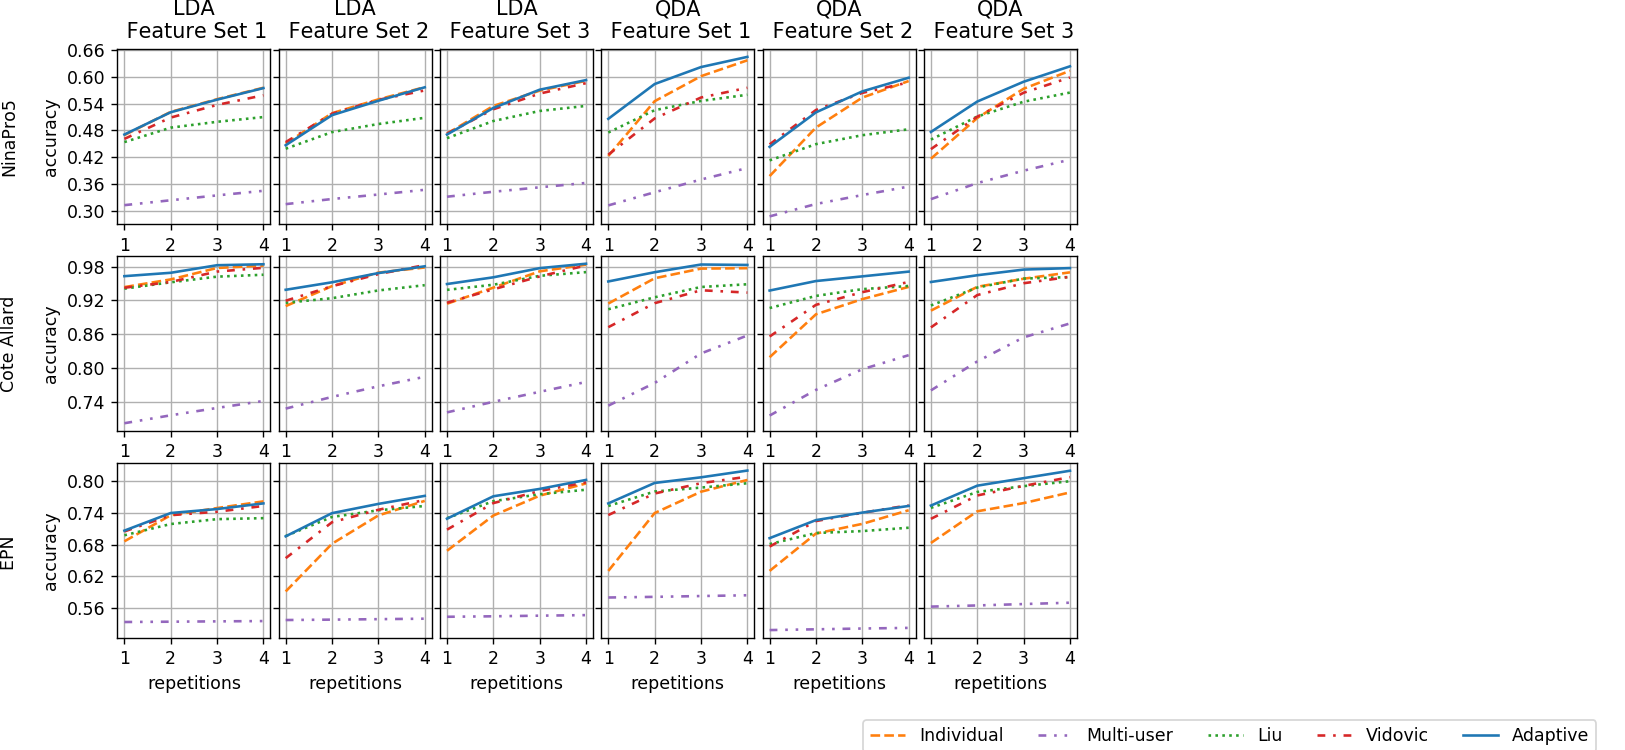

In [117]:
def graphACC(Partition):
    FeatureSetM=3
    fig , ax = plt.subplots(nrows=3, ncols=6, sharey='row', figsize=(13, 6))
#     shot=np.arange(1,5)
    for classifier in range(2):
        for FeatureSet in range(FeatureSetM):
            for Data in range(FeatureSetM):
                if Data==0:
                    shot=np.arange(1,5)
                    if Partition=='Time':
                        results=resultsNina5T
                    elif Partition=='Random':
                        results=resultsNina5R   
                    ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0.30, 1, .06))
                elif Data==1:
                    shot=np.arange(1,5)
                    if Partition=='Time':
                        results=resultsCoteT
                    elif Partition=='Random':
                        results=resultsCoteR 
                    ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0.62, 1, 0.06))
                elif Data==2:
                    shot=np.arange(1,5)
                    if Partition=='Time':
                        results=resultsEPNT
                        shot=np.arange(1,5)
                    elif Partition=='Random':
                        results=resultsEPNR 
                    ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0.50, 1, 0.06))




                value=0.05

                if classifier == 0:

#                     Model='T-test (LDA_Ind)'                
#                     a=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
#                     markers_on = list(np.where(a <= value)[0])


                    

                    Model='LDA_Ind'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet].plot(shot,Y,label='Individual',color='tab:orange',linestyle='--')
                    
                    Model='LDA_Multi'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet].plot(shot,Y,label='Multi-user',color='tab:purple',linestyle=(0,(3,3,1,3,1,3)))


                    Model='LiuL'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet].plot(shot,Y,label='Liu',color='tab:green',linestyle=':') 
                    
                    Model='VidL'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet].plot(shot,Y,label='Vidovic',color='tab:red',linestyle=(0,(3,3,1,3)))
                    
                    Model='PropQ_L'       
                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet].plot(shot,Y,label='Adaptive',color='tab:blue')


                 
                    
                    ax[Data,FeatureSet].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
                    
                    if len(shot)==25:
                        ax[Data,FeatureSet].xaxis.set_ticks([1,5,10,15,20,25])
                    else:
                    
                        ax[Data,FeatureSet].xaxis.set_ticks(np.arange(1,len(shot)+.2 , 1))
                    ax[Data,FeatureSet].grid()




                elif classifier == 1:

#                     Model='T-test (QDA_Ind)'                
#                     a=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
#                     markers_on = list(np.where(a <= value)[0])

                    


                    Model='QDA_Ind'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet+3].plot(shot,Y,label='Individual',color='tab:orange',linestyle='--')
                    
                    Model='QDA_Multi'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet+3].plot(shot,Y,label='Multi-user',color='tab:purple',linestyle=(0,(3,3,1,3,1,3)))


                    Model='LiuQ'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet+3].plot(shot,Y,label='Liu',color='tab:green',linestyle=':') 
                    
                    Model='VidQ'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet+3].plot(shot,Y,label='Vidovic',color='tab:red',linestyle=(0,(3,3,1,3))) 
                    
                    Model='PropQ'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
#                     ax[Data,FeatureSet+3].plot(shot,Y,label='Adaptive')
                    ax[Data,FeatureSet+3].plot(shot,Y,label='Adaptive',color='tab:blue')
                    
                    
                    ax[Data,FeatureSet+3].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
                   
                    if len(shot)==25:
                        ax[Data,FeatureSet+3].xaxis.set_ticks([1,5,10,15,20,25])
                    else:                  
                        ax[Data,FeatureSet+3].xaxis.set_ticks(np.arange(1,len(shot)+.2 , 1))
                    ax[Data,FeatureSet+3].grid()



                
#     ax[2,0].set_xlabel('shots')
    ax[2,0].set_xlabel('repetitions')
    ax[2,1].set_xlabel('repetitions')
    ax[2,2].set_xlabel('repetitions')
    ax[2,3].set_xlabel('repetitions')
    ax[2,4].set_xlabel('repetitions')
    ax[2,5].set_xlabel('repetitions')
#     ax[2,2].set_xlabel('shots')
    ax[0,0].set_title('LDA\n Feature Set 1')
    ax[0,1].set_title('LDA\n Feature Set 2')
    ax[0,2].set_title('LDA\n Feature Set 3')
#     ax[2,3].set_xlabel('shots')
#     ax[2,4].set_xlabel('repetitions')
#     ax[2,5].set_xlabel('shots')
    ax[0,3].set_title('QDA\n Feature Set 1')
    ax[0,4].set_title('QDA\n Feature Set 2')
    ax[0,5].set_title('QDA\n Feature Set 3')
    ax[0,0].set_ylabel('NinaPro5\n\naccuracy')
    ax[1,0].set_ylabel('Cote Allard\n\naccuracy')
    ax[2,0].set_ylabel('EPN \n\naccuracy')
#     ax[1,5].legend(loc=0,prop={'size':7})
    ax[2,5].legend(loc='lower center', bbox_to_anchor=(2, -0.7), ncol=5)
#     ax[0,5].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
#     ax[0,2].legend(loc='best',prop={'size': 7}) 
#     ax[1,2].legend(loc='best',prop={'size': 7}) 
#     ax[2,2].legend(loc='best',prop={'size': 7})  
    fig.tight_layout(pad=0.1)
    plt.savefig("fig1.png", bbox_inches='tight', dpi=600)
    plt.show()

    
    
graphACC('Time')

<IPython.core.display.Javascript object>


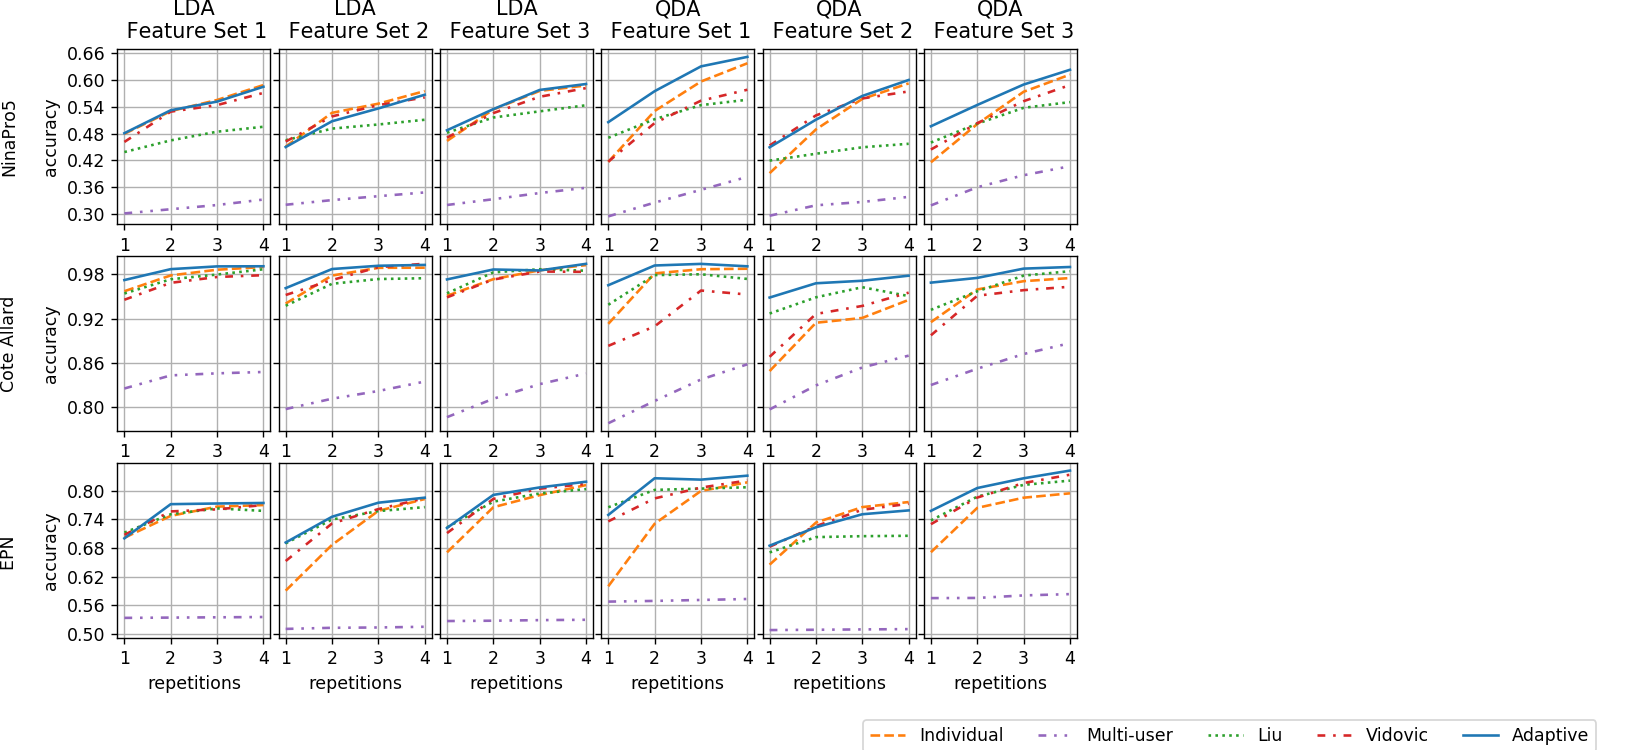

In [127]:
graphACC('Time')

<IPython.core.display.Javascript object>


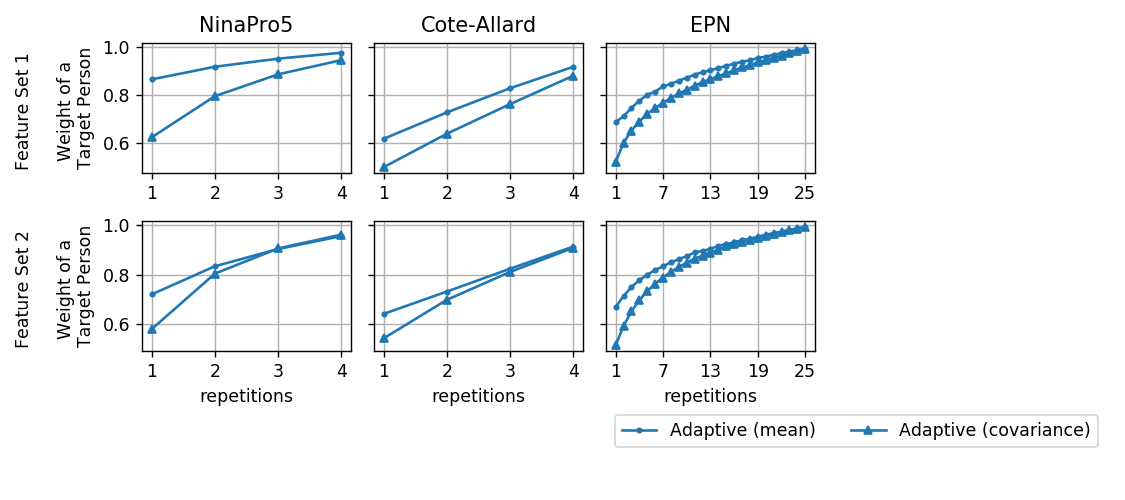

In [120]:

def graphWeights():
    Partition='Time'
    FeatureSetM=3
    fig , ax = plt.subplots(nrows=2, ncols=3, sharey='row', figsize=(9, 4))
#     shot=np.arange(1,5)
    for feature in range(1,3):
        for Data in range(3):

            if Data==0:
                shot=np.arange(1,5)
                shots=5
                if Partition=='Time':
                    results=resultsNina5T
                elif Partition=='Random':
                    results=resultsNina5R   
                ax[feature-1,Data].xaxis.set_ticks(np.arange(1, 4.1, 1))
                title='NinaPro5'
            elif Data==1:
                shot=np.arange(1,5)
                shots=5
                if Partition=='Time':
                    results=resultsCoteT
                elif Partition=='Random':
                    results=resultsCoteR 
                ax[feature-1,Data].xaxis.set_ticks(np.arange(1, 4.1, 1))
                title='Cote-Allard'
            elif Data==2:
                shot=np.arange(1,5)
                shots=5
                if Partition=='Time':
                    results=resultsEPNT
                    shot=np.arange(1,26)
                    shots=26
                elif Partition=='Random':
                    results=resultsEPNR 
                ax[feature-1,Data].xaxis.set_ticks(np.arange(1, 25.1, 6))
                title='EPN'




    #         wm=np.zeros(shots-1)
    #         wc=np.zeros(shots-1)      
    #         for FeatureSet in range(FeatureSetM):  
    #             wm+=np.array(results['wmQ'].loc[results['Feature Set']==FeatureSet+1])
    #             wc+=np.array(results['wcQ'].loc[results['Feature Set']==FeatureSet+1])


            wm=np.array(results['wmQ'].loc[results['Feature Set']==feature])
            wc=np.array(results['wcQ'].loc[results['Feature Set']==feature])


            
            
                
            ax[feature-1,Data].plot(shot,wm,label='Adaptive (mean)',marker='.',color='tab:blue',markersize=5)
            ax[feature-1,Data].plot(shot,wc,label='Adaptive (covariance)',marker='^',color='tab:blue',markersize=5)
#             else:
#                 ax[feature-1,Data].plot(shot,wm,marker='.',color='tab:blue')
#                 ax[feature-1,Data].plot(shot,wc,marker='^',color='tab:blue')
                
#             ax[feature-1,Data].plot(shot,np.ones(shots-1)*0.5,label='Liu',linestyle=':',color='tab:red')
            ax[0,Data].set_title(title)
            ax[feature-1,Data].grid()
                
#     ax[2,0].set_xlabel('shots')
    ax[1,0].set_xlabel('repetitions')
    ax[1,1].set_xlabel('repetitions')
    ax[1,2].set_xlabel('repetitions')
    ax[0,0].set_ylabel('Feature Set 1 \n\nWeight of a \nTarget Person')
    ax[1,0].set_ylabel('Feature Set 2 \n\nWeight of a \nTarget Person')
    lgd = ax[1,2].legend(loc='lower center', bbox_to_anchor=(1.2, -0.8), ncol=2)
#     fig.legend(loc='lower center', bbox_to_anchor=(0.53, -0.05), ncol=2)
    fig.tight_layout(pad=1)
    plt.savefig("w.png", bbox_inches='tight', dpi=600,bbox_extra_artists=(lgd,))
    plt.show()


graphWeights()

# Statistical Analysis of the results

In [132]:
def Analysis():

    s=1
    bases=['NinaPro5','Cote','EPN']
    confidence=0.05
    windows=['Databases','Databases295']
    results= pd.DataFrame() 
    



#     for w in windows:
    w='Total'

#     for methodCL in range(2):
    methodCL=0
    idxD=0
    print('\n\n','Method '+str(methodCL)+' ' + w)
    for base in bases:
        print('\n\n',base)
        if base=='NinaPro5':
            samples=4
            people=10
            shots=5
        elif base=='Cote':
            samples=4
            people=17
            shots=5
        elif base=='EPN':
            samples=25
            people=30
            shots=5
        idx=0
        for f in range(1,4):   
            
            
            for s in range(1,shots):


                place="Experiments/DatabasesEvaluation/Results/Results"+w+"/"+base
                DataFrame=uploadData(place,samples,people,shots)

#                 place="Experiments/CotePyTorchImplementation/Cote_CWT_"+base+"/"
#                 cote=pd.read_csv(place+"Pytorch_results_"+str(s)+"_cycles.csv",header=None)

                if methodCL==0:                
                    propQ=DataFrame['AccQDAProp'].loc[(DataFrame['Feature Set']==f)&(DataFrame['# shots']==s)].values*100
                    propL=DataFrame['AccLDAPropQ'].loc[(DataFrame['Feature Set']==f)&(DataFrame['# shots']==s)].values*100
                    indQ=DataFrame['AccQDAInd'].loc[(DataFrame['Feature Set']==f)&(DataFrame['# shots']==s)].values*100
                    indL=DataFrame['AccLDAInd'].loc[(DataFrame['Feature Set']==f)&(DataFrame['# shots']==s)].values*100
                    liuL=DataFrame['AccLDALiu'].loc[(DataFrame['Feature Set']==f)&(DataFrame['# shots']==s)].values*100
                    liuQ=DataFrame['AccQDALiu'].loc[(DataFrame['Feature Set']==f)&(DataFrame['# shots']==s)].values*100
                    vidL=DataFrame['AccLDAVidovic'].loc[(DataFrame['Feature Set']==f)&(DataFrame['# shots']==s)].values*100
                    vidQ=DataFrame['AccQDAVidovic'].loc[(DataFrame['Feature Set']==f)&(DataFrame['# shots']==s)].values*100


#                     if base=='NinaPro5':    
#                         c=[]
#                         for i in range(people):
#                             c.append(np.array(ast.literal_eval(cote.loc[0][i])).T[0].mean())
#                         c=np.array(c)
#                     elif base=='EPN':
#                         c=[]
#                         for i in range(20):
#                             c.append(ast.literal_eval(cote.loc[0][i]))
#                         c=np.mean(np.array(c),axis=0)
#                     elif base=='Cote':
#                         c=[]
#                         for i in range(20):
#                             c.append(ast.literal_eval(cote.loc[0][i]))
#                             c.append(ast.literal_eval(cote.loc[1][i]))
#                         c=np.mean(np.array(c),axis=0)




#                 iL=np.mean(indL)
#                 iQ=np.mean(indQ)
#                 pL=np.mean(propL)
#                 pQ=np.mean(propQ)
# #                 co=np.median(c)
#                 lL=np.mean(liuL)
#                 lQ=np.mean(liuQ)
#                 vL=np.mean(vidL)
#                 vQ=np.mean(vidQ)
                
                iL=np.median(indL)
                iQ=np.median(indQ)
                pL=np.median(propL)
                pQ=np.median(propQ)
#                 co=np.median(c)
                lL=np.median(liuL)
                lQ=np.median(liuQ)
                vL=np.median(vidL)
                vQ=np.median(vidQ)

                siL=np.std(indL)
                siQ=np.std(indQ)
                spL=np.std(propL)
                spQ=np.std(propQ)
#                 sco=np.std(c)
                slL=np.std(liuL)
                slQ=np.std(liuQ)
                svL=np.std(vidL)
                svQ=np.std(vidQ)



        #         iL=np.median(indL)
        #         iQ=np.median(indQ)
        #         pL=np.median(propL)
        #         pQ=np.median(propL)
        #         co=np.median(c)
        #         l=np.median(liu)
        #         lF=np.median(liuF)

#                 print('\nshot: ',s, ' feature: ',f)
            

#                 print('\n Analysis Wilcoxon')



#                 print('\nIndL:',round(iL,2),' PropL:',round(pL,2),' LiuL:',round(lL,2)                      
#                       ,' vidL:',round(vL,2))

#                 print('IndL:',round(siL,2),' PropL:',round(spL,2),' LiuL:',round(slL,2)
#                       ,' vidL:',round(svL,2))
                
                WilcoxonMethod='wilcox'
                alternativeMethod='greater'
                
                
                
                
                
                
                
                results.at['propL LDA'+base,idx]=round(pL-iL,2)
                results.at['propL LDA (p)'+base,idx]=1
                if pL>iL:
                    p=stats.wilcoxon(propL,indL,alternative=alternativeMethod,zero_method=WilcoxonMethod)[1]
                    if p<confidence:
#                         print('Acc PropL is higher than Acc IndL (p<'+str(confidence)+')',p)
                        results.at['propL LDA (p)'+base,idx]=p
                elif iL>pL:
                    p=stats.wilcoxon(indL,propL,alternative=alternativeMethod,zero_method=WilcoxonMethod)[1]
                    if p<confidence:
#                         print('Acc IndL is higher than Acc PropL (p<'+str(confidence)+')',p)
                        results.at['propL LDA (p)'+base,idx]=p
                        print(1)
                
                results.at['propL LiuL'+base,idx]=round(pL-lL,2)
                results.at['propL LiuL (p)'+base,idx]=1
                if pL>lL:
                    p=stats.wilcoxon(propL,liuL,alternative=alternativeMethod,zero_method=WilcoxonMethod)[1]
                    if p<confidence:                        
#                         print('Acc PropL is higher than Acc Liu LDA (p<'+str(confidence)+')',p)
                        results.at['propL LiuL (p)'+base,idx]=p
                elif lL>pL:
                    p=stats.wilcoxon(liuL,propL,alternative=alternativeMethod,zero_method=WilcoxonMethod)[1]
                    if p<confidence:
#                         print('Acc Liu LDA is higher than Acc PropL (p<'+str(confidence)+')',p)
                        results.at['propL LiuL (p)'+base,idx]=p
                        print(1)

#                 if pL>co:
#                     p=stats.wilcoxon(propL,c,alternative=alternativeMethod,zero_method='zsplit')[1]
#                     if p<confidence:
#                         print('Acc PropL is higher than Acc Cote (p<'+str(confidence)+')',p)
#                 elif co>pL:
#                     p=stats.wilcoxon(c,propL,alternative=alternativeMethod,zero_method='zsplit')[1]
#                     if p<confidence:
#                         print('Acc Cote is higher than Acc PropL (p<'+str(confidence)+')',p)
                results.at['propL VidovicL'+base,idx]=round(pL-vL,2)
                results.at['propL VidovicL (p)'+base,idx]=1
                if pL>vL:
                    p=stats.wilcoxon(propL,vidL,alternative=alternativeMethod,zero_method=WilcoxonMethod)[1]
                    if p<confidence:
#                         print('Acc PropL is higher than Acc Vidovic LDA (p<'+str(confidence)+')',p)
                        results.at['propL VidovicL (p)'+base,idx]=p
                elif vL>pL:
                    p=stats.wilcoxon(vidL,propL,alternative=alternativeMethod,zero_method=WilcoxonMethod)[1]
                    if p<confidence:
#                         print('Acc Vidovic LDA is higher than Acc PropL (p<'+str(confidence)+')',p)
                        results.at['propL VidovicL (p)'+base,idx]=p
                        print(1)
#                 if pL>vQ:
#                     p=stats.wilcoxon(propL,vidQ,alternative=alternativeMethod,zero_method='zsplit')[1]
#                     if p<confidence:
#                         print('Acc PropL is higher than Acc Vidovic QDA (p<'+str(confidence)+')',p)
#                 elif vQ>pL:
#                     p=stats.wilcoxon(vidQ,propL,alternative=alternativeMethod,zero_method='zsplit')[1]
#                     if p<confidence:
#                         print('Acc Vidovic QDA is higher than Acc PropL (p<'+str(confidence)+')',p)

#                 QDA

#                 print('\nIndQ:',round(iQ,2),' PropQ:',round(pQ,2),' LiuQ:',round(lQ,2)                      
#                       ,' vidQ:',round(vQ,2))

#                 print('IndQ:',round(siQ,2),' PropQ:',round(spQ,2),' LiuQ:',round(slQ,2)
#                       ,' vidQ:',round(svQ,2))
                
                results.at['propQ QDA BL'+base,idx]=round(pQ-iQ,2)
                results.at['propQ QDA BL (p)'+base,idx]=1
                if pQ>iQ:
                    p=stats.wilcoxon(propQ,indQ,alternative=alternativeMethod,zero_method=WilcoxonMethod)[1]
                    if p<confidence:
#                         print('Acc PropQ is higher than Acc IndQ (p<'+str(confidence)+')',p)
                        results.at['propQ QDA BL (p)'+base,idx]=p
    #                 else:
    #                     print('Acc PropL is better than Acc Ind')
                elif iQ>pQ:
                    p=stats.wilcoxon(indQ,propQ,alternative=alternativeMethod,zero_method=WilcoxonMethod)[1]
                    if p<confidence:
#                         print('Acc IndQ is higher than Acc PropQ (p<'+str(confidence)+')',p)
                        results.at['propQ QDA BL (p)'+base,idx]=p
                        print(1)
                
                results.at['propQ LiuQ'+base,idx]=round(pQ-lQ,2)
                results.at['propQ LiuQ (p)'+base,idx]=1
                if pQ>lQ:
                    p=stats.wilcoxon(propQ,liuQ,alternative=alternativeMethod,zero_method=WilcoxonMethod)[1]
                    if p<confidence:
#                         print('Acc PropQ is higher than Acc Liu QDA (p<'+str(confidence)+')',p)
                        results.at['propQ LiuQ (p)'+base,idx]=p
                elif lQ>pQ:
                    p=stats.wilcoxon(liuQ,propQ,alternative=alternativeMethod,zero_method=WilcoxonMethod)[1]
                    if p<confidence:
#                         print('Acc Liu QDA is higher than Acc PropQ (p<'+str(confidence)+')',p)
                        results.at['propQ LiuQ (p)'+base,idx]=p
                        print(1)

#                 if pQ>co:
#                     p=stats.wilcoxon(propQ,c,alternative=alternativeMethod,zero_method='zsplit')[1]
#                     if p<confidence:
#                         print('Acc PropQ is higher than Acc Cote (p<'+str(confidence)+')',p)
#                 elif co>pQ:
#                     p=stats.wilcoxon(c,propQ,alternative=alternativeMethod,zero_method='zsplit')[1]
#                     if p<confidence:
#                         print('Acc Cote is higher than Acc PropQ (p<'+str(confidence)+')',p)
                results.at['propQ Vidovic QDA'+base,idx]=round(pQ-vQ,2)
                results.at['propQ Vidovic QDA (p)'+base,idx]=1
                if pQ>vQ:
                    p=stats.wilcoxon(propQ,vidQ,alternative=alternativeMethod,zero_method=WilcoxonMethod)[1]
                    if p<confidence:
#                         print('Acc PropQ is higher than Acc Vidovic QDA (p<'+str(confidence)+')',p)
                        results.at['propQ Vidovic QDA (p)'+base,idx]=p
                elif vQ>pQ:
                    p=stats.wilcoxon(vidQ,propQ,alternative=alternativeMethod,zero_method=WilcoxonMethod)[1]
                    if p<confidence:
#                         print('Acc Vidovic QDA is higher than Acc PropQ (p<'+str(confidence)+')',p)
                        results.at['propQ Vidovic QDA (p)'+base,idx]=p


                idx+=1
        idxD+=12
    return results
        
r=Analysis()
r



 Method 0 Total


 NinaPro5


 Cote


 EPN


,0,1,2,3,4,5,6,7,8,9,10,11
propL LDANinaPro5,0.140000,0.190000,-0.360000,-0.380000,-0.100000,-1.890000e+00,-1.060000,-0.820000,2.390000,0.080000,0.220000,3.300000e-01
propL LDA (p)NinaPro5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.046300,1.091214e-02
propL LiuLNinaPro5,4.220000,6.750000,6.740000,8.960000,-1.510000,1.650000e+00,3.590000,5.600000,0.550000,1.880000,4.790000,4.760000e+00
propL LiuL (p)NinaPro5,1.000000,0.006258,0.002531,0.002531,1.000000,2.531016e-03,0.002531,0.002531,1.000000,0.003455,0.002531,2.531016e-03
propL VidovicLNinaPro5,1.950000,0.310000,0.790000,1.380000,-1.220000,-1.080000e+00,-0.740000,0.600000,1.650000,0.890000,1.530000,9.100000e-01
propL VidovicL (p)NinaPro5,1.000000,0.014208,0.010912,0.002531,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,0.014208,1.832896e-02
propQ QDA BLNinaPro5,8.900000,4.440000,3.390000,1.430000,5.800000,2.180000e+00,0.660000,0.760000,8.080000,4.270000,1.620000,1.080000e+00
propQ QDA BL (p)NinaPro5,0.002531,0.002531,0.003455,0.006258,0.003455,6.257659e-03,1.000000,0.023427,0.002531,0.002531,0.023427,1.832896e-02
propQ LiuQNinaPro5,3.500000,6.270000,8.680000,9.600000,2.990000,7.630000e+00,11.490000,14.280000,3.650000,4.190000,5.210000,7.240000e+00
propQ LiuQ (p)NinaPro5,0.008302,0.006258,0.003455,0.002531,0.002531,2.531016e-03,0.002531,0.002531,1.000000,0.014208,0.003455,3.455215e-03
